# Décima Segunda Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza - 2021004023 ##
### Exercício 1 ###
Mostrar o gráfico do sinal anexo no tempo (tempo x amplitude) bem como os gráficos de seu espectro. Quais são as frequências das componentes significativas (as que estão acima do ruído e quais os valores numéricos de suas amplitudes)?

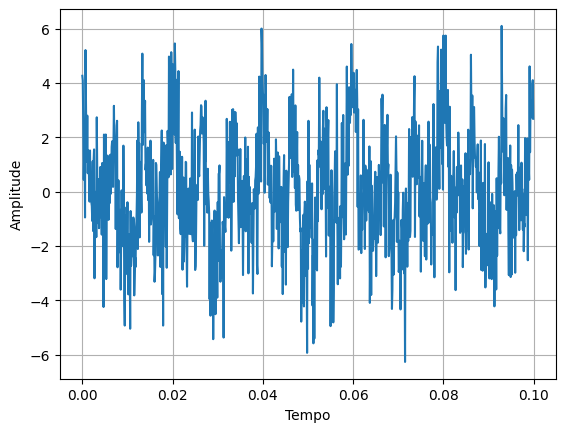

Componentes significativas:
Frequência: 50.0 | Amplitude: 0.9174
Frequência: 150.0 | Amplitude: 1.5776
Frequência: 300.0 | Amplitude: 0.8432


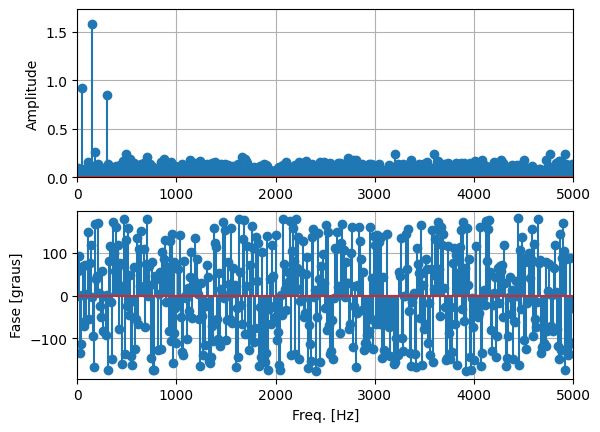

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import espectro
import importlib

importlib.reload(espectro)

fs = 10000

s = np.load('sinal.npy')
Ts = 1/fs

t = np.arange(0, len(s)*Ts, Ts)

fig = plt.figure()
plt.cla()
plt.plot(t, s)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

espectro.espectro1D(s, fs, 1)


### Exercício 2 ###
Construir sua própria função Python para executar a convolução usando ou o **ponto de vista da entrada** ou o **ponto de vista da saída**. A função deve receber apenas duas variáveis com os vetores que serão usados na convolução e deve devolver somente o vetor com o resultado. Testar a função acima com os vetores [1,3,7,5] e [0,6,4,2].

In [2]:
def convolucaoEntrada (entrada, respostaImpulso):
    n = len(entrada)
    m = len(respostaImpulso)
    y = [0]*(n+m-1)
    for p in range(n):
        for q in range(m):
            y[p+q] += entrada[p]*respostaImpulso[q]
    return y

entrada = [1,3,7,5]
respostaImpulso = [0,6,4,2]
print(convolucaoEntrada(entrada,respostaImpulso))

[0, 6, 22, 56, 64, 34, 10]


### Exercício 3 ### 
Construir sua própria função Python para executar a convolução na versão para execução em **tempo real**. A função deve receber apenas duas variáveis com os vetores que serão usados na convolução e deve devolver somente o vetor com o resultado.

In [3]:
def convolucaoTempoReal (entrada, respostaImpulso):
    m = len(respostaImpulso)
    x_aux = [0]*(m-1)
    
    i = 0
    while i < len(entrada):
        y = respostaImpulso[0]*entrada[i]
        for k in range(1, m):
            y += respostaImpulso[k]*x_aux[m-k-1]
        print(y)
        for k in range(m-2):
            x_aux[k] = x_aux[k+1]
        x_aux[m-2] = entrada[i]
        i += 1
        
print(convolucaoTempoReal(entrada,respostaImpulso))

0
6
22
56
None


### Exercício 4 ###
Executar a filtragem do sinal anexo com filtro ***Moving Average*** <u>na forma FIR</u> para reduzir o ruído aleatório ao máximo, sem que afete significativamente (tolerância de ±30%) as amplitudes das componentes que devem permanecer no sinal. Fazer a execução usando uma das funções python desenvolvidas nos exercícios anteriores.

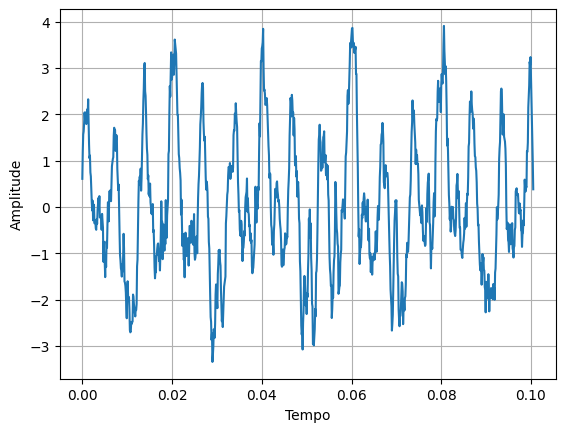

Componentes significativas:
Frequência: 49.7 | Amplitude: 0.9089
Frequência: 149.1 | Amplitude: 1.4971
Frequência: 298.2 | Amplitude: 0.6797


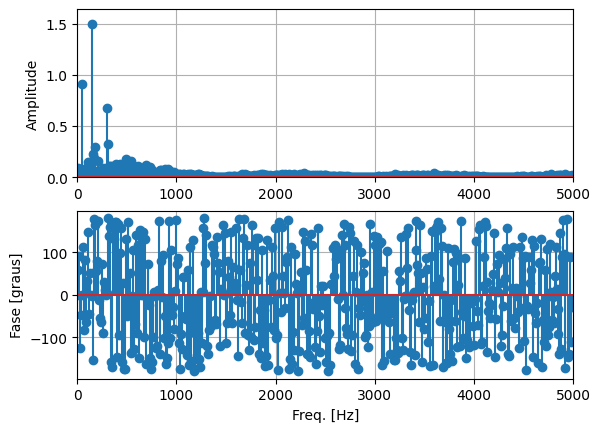

In [4]:
M = 7
respostaImpulso = [1/M]*M
sinal_filtrado = np.array(convolucaoEntrada(s,respostaImpulso))

t = np.arange(0, len(sinal_filtrado)*Ts, Ts)

fig = plt.figure()
plt.cla()
plt.plot(t, sinal_filtrado)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

espectro.espectro1D(sinal_filtrado, fs, 1)